# Benign vs Malignant Tumor Classification
## Written by: Eric J. Puttock
### Last Updated: 08/31/2020

____________________________________________________________________________________________________________________________________
# **Introduction**: Machine Learning & Need for Diagnostic Tools
Machine learning is widely used in many applications ranging from estimating a price of a home, classifying and analyzing regions of an image (for example, MRI scans), and even translating words into another language! Having worked in the field of mathematical biology for nearly a decade, I wanted to look into a project that is simple and is at the intersection of data science and biology.

Cancer is the number one leading cause of death in the WORLD with Lung, Breast, Colon being the top 3 [[World Health Organization (WHO)]](https://www.who.int/news-room/fact-sheets/detail/cancer). Lung cancer and Colon cancer are among the top most diagnosed cancers around the globe. Colon cancer is the second leading cause of cancer deaths in the United States, with one in 20 people diagnosed with colon cancer in their lifetime. It is also distinctly an age-related disease, with most patients being diagnosed over the age of 50 (_Society, A.C., Colorectal Cancer Facts & Figures 2017-2019. 2017_). Tumors are lumps of tissue that can be cancerous (Malignant) or not cancerous (Benign). Being able to diagnose patients early before the progression of the disease can lead to better patient care and greater chances of survival.

Primary Objective: **Can we correctly diagnose a breast cancer tumor as benign or malignant with high accuracy given a set of morphological features?**

In this project, I aim to investigate whether a benign or malignant tumor can be identified from a set of experimental measurements.

Additionally, we also aim to identify which features have the most weight in determining/predicting that a tumor is beign or malignant. We attempt to do this by using some well-known simple classification techniques in the field of machine learning.


____________________________________________________________________________________________________________________________________

# **The Data & Attributes**: Breast Cancer Wisconsin (Diagnostic) Data Set
Breast cancer data was made publicly available from University of Wisconsin. The dataset contains 32 features/measurements/characteristics measured from benign or malignant tumors. Each measurement was computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. In this dataset, we have have a total of 569 tumors, 357 labeled benign (B) and 212 labeled malignant (M).

#### Attribute Information:
We have 2 attributes that help ID the tumor, and its diagnosis. The Diagnosis attribute will be our target set that we are trying to predict.

- 1) ID number

- 2) Diagnosis (M = malignant, B = benign)

There are ten real-valued (four significant digits) features computed for each cell nucleus. **Three values were computed from each feature listed below**. The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 attributes. 

- F1) radius (mean of distances from center to points on the perimeter)
- F2) texture (standard deviation of gray-scale values)
- F3) perimeter
- F4) area
- F5) smoothness (local variation in radius lengths)
- F6) compactness (perimeter^2 / area - 1.0)
- F7) concavity (severity of concave portions of the contour)
- F8) concave points (number of concave portions of the contour)
- F9) symmetry
- F10) fractal dimension ("coastline approximation" - 1)

What's amazing about this data set? There are no missing attribute values and quite organized! Data sets are often missing values and require some work to clean up.
_________________________________________________________________________________________

This dataset is available through the UW CS ftp server:
- ftp ftp.cs.wisc.edu
- cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Also available on Kaggle:
- https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
____________________________________________________________________________________________________________________________________

# Methodology
- Create a dataframe to keep the data organized and easy to access.
- Divide the data into Training (further divided cross-validation sets) and Testing sets.
- Consider classification models that make sense.
    - In this project, several variants of the Logistic Regression Model is used.     
    - I plan to extend this project to have additional classifications models in the future: K-Nearest Neighbors, Decision-Trees, Random-Forest, Neural Networks, SVD with Linear Kernel, etc. 
- Train & Test the models, compare accuracy, and discuss some of the benefits/flaws of the model from the analysis.
- Conclusion

Let's load the data into a pandas dataframe and move on to the **E**xploratory **D**ata **A**nalysis (EDA).

# Load the Data & Exploratory Data Analysis (EDA)
Let's learn about our data and see if there are any interesting trends we can observe prior to performing any special analysis.

In [1]:
# Datafram & Scientific Computing Libraries (Pandas and Numpy)
import pandas as pd
import numpy as np

# Visualization Libraries (Matplotlib & Seaborn)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Import Breast Cancer Wisconson Data (via CSV file) into dataframe.
BCW_df = pd.read_csv('datasets_180_408_data.csv')
display(BCW_df.head())
display(BCW_df.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

None

After a quick look through the data, we notice a few things.
- We have a column called 'Unnamed:32' that doesn't seem to contain any data. We will drop this set when we perform the analysis.
- We have an ID column that is there for the data providers to identify each tumor back to the source. This will not help us in our analysis so we will drop this set as well.
- We have a total of 569 rows of tumor data, with 1 target attribute of our interest ('diagnosis') and 30 attributes containing real values, and that we don't have any missing values as expected from the data provider.

I will go ahead and drop these columns first. Let's look more into the specific attributes.

In [3]:
BCW_df = BCW_df.drop(['id', 'Unnamed: 32'], axis = 1)
display(BCW_df.head())
display(BCW_df.describe())

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


As we look through our data statistics, we can clearly see if we have data on different scales. We will re-scale these values when we work on training our machine learning models.

Let's see how these scales vary by Diagnosis.

In [4]:
display(BCW_df.query('diagnosis == "M"').describe())
display(BCW_df.query('diagnosis == "B"').describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


We can already see some differences in some of the parameters. Tumors that are benign seem to have have a smaller area_mean attribute in comparison to malignant tumors.
- However, these could be due to outliers in the data. Let's observe some of these visually.

Do any of the features correlate with each other? Do we have redundant data?

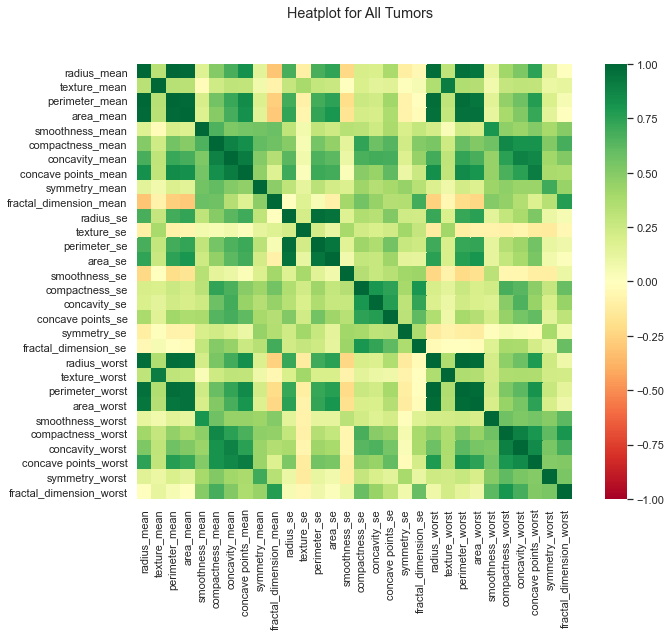

In [5]:
_ = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(BCW_df.drop(columns = 'diagnosis', axis = 1).corr(), square=True, cmap='RdYlGn', vmin = -1, vmax = 1)
_ = plt.suptitle('Heatplot for All Tumors')
plt.show()

We see there along the diagonal strong positive correlation. This is normal since it's checking the correlation against itself!

What's interesting to see here, is that there are some attraibutes correlating with others.
- For example, we see radius_mean having strong positive correlations with perimeter_mean, area_mean, radius_worst, and perimeter_worst.

Let's take a look at these and see what they look like.

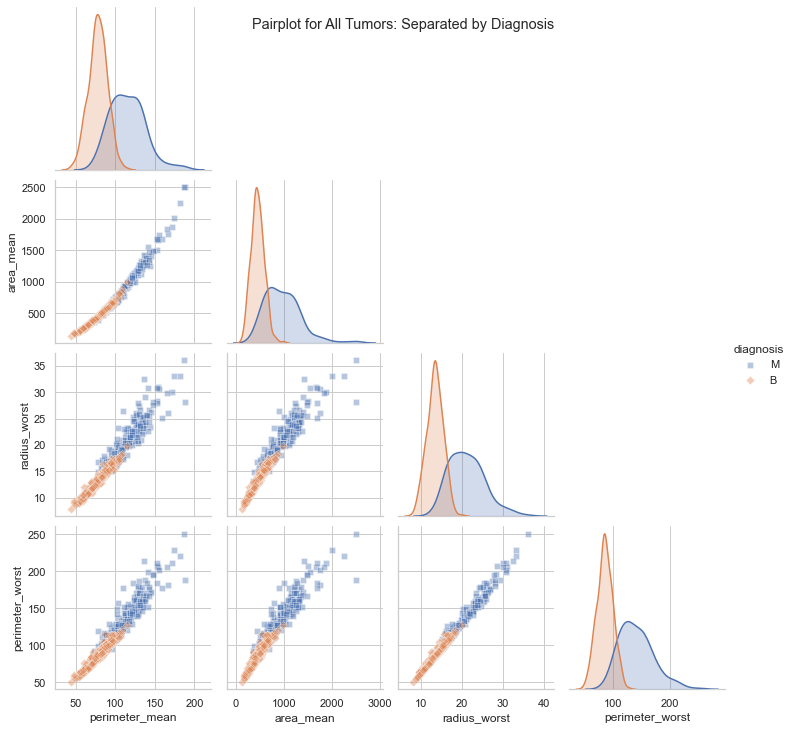

In [6]:
columnsOfInterest = ['diagnosis','perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']
_ = sns.pairplot(data = BCW_df[columnsOfInterest], hue = 'diagnosis', markers=["s", "D"], corner = True, plot_kws=dict(alpha=0.4))
_ = plt.suptitle('Pairplot for All Tumors: Separated by Diagnosis')
plt.show()

It's interesting to see that these features certainly look strongly positively correlated, but they also seem to show some different distributions by diagnosis.

Since they do seem to help distinguish the diagnosis, although strongly positively correlated, they won't be considered as redundant data.

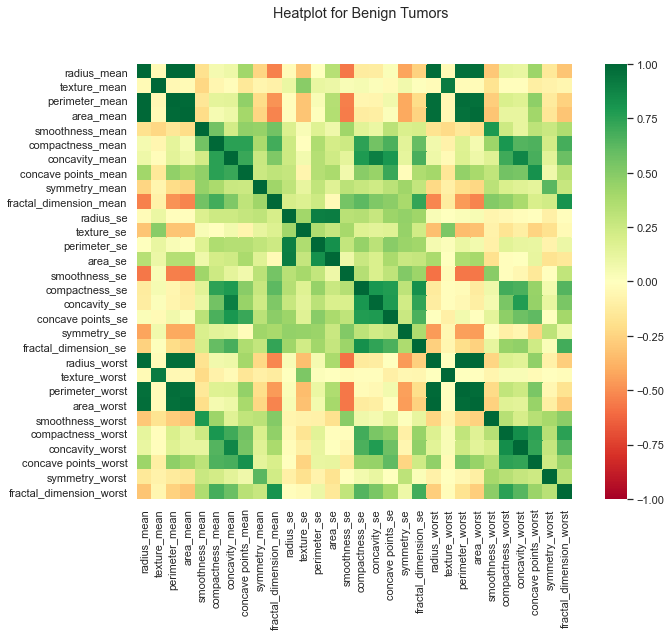

In [7]:
_ = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(BCW_df.query('diagnosis == "B"').drop(columns = 'diagnosis', axis = 1).corr(), square=True, cmap='RdYlGn', vmin = -1, vmax = 1)
_ = plt.suptitle('Heatplot for Benign Tumors')
plt.show()

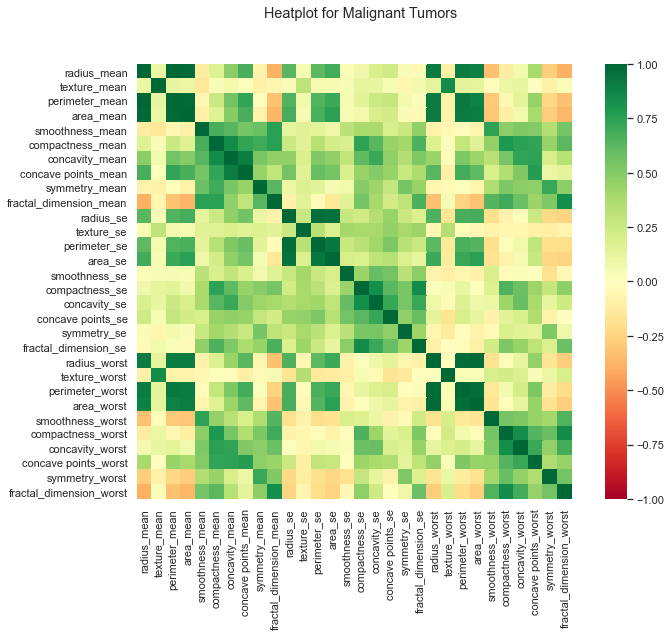

In [8]:
_ = plt.subplots(figsize=(12, 8))
_ = sns.heatmap(BCW_df.query('diagnosis == "M"').drop(columns = 'diagnosis', axis = 1).corr(), square=True, cmap='RdYlGn', vmin = -1, vmax = 1)
_ = plt.suptitle('Heatplot for Malignant Tumors')
plt.show()

We see there are some attributes that are more correlated with Malignant Tumors than are with Benign Tumors.
 - Example: Concave_points_ mean
 
It's possible that a more complex model would be needed to automatically capture these features to help increase accuracy of the diagnosis.

# Machine Learning & Data Analysis

First, we will transform our labels from 'B' and 'M' to 0's and 1's respectively.

Then, we will create our feature matrix, and our target vector for the classification.

Afterwards, we will break up our data into two sets for training and testing for each of the classification models we will investigate:
- Training set: Data that will be used to train our models. Cross-validation will be done within this data to determine any additional hyper-parameter tuning.
- Testing set: This data set will be used to test our models as the model has not seen this data set yet.

The Logistic regression classification model will be used for this project. We will evaluate the model using variant version of the model.
- Additional models to consider in the future: K-Nearest Neighbors, Decision-Trees, Random-Forest, Neural Networks, SVD with Linear Kernel, etc.

Let's first dive in by breaking up the data.

In [9]:
# Transform the labels 'B' and "M" to 0's and 1's respectively using pandas get_dummies method.
BCW_df = pd.get_dummies(data = BCW_df, columns = ['diagnosis'], drop_first = True)
display(BCW_df.head())
y = BCW_df['diagnosis_M'].values
X = BCW_df.drop('diagnosis_M', axis = 1).values
print(X.shape, y.shape)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


(569, 30) (569,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_trainZ, X_testZ, y_trainZ, y_testZ = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print(X_trainZ.shape, y_trainZ.shape, X_testZ.shape, y_testZ.shape)

(398, 30) (398,) (171, 30) (171,)
(398, 30) (398,) (171, 30) (171,)


For the sake of checking that the data is balanced, let's check that the sum of 1's are roughly half the number of rows.

In [11]:
print(y_train.sum(), y_test.sum())
print(y_trainZ.sum(), y_testZ.sum())

149 63
148 64


Good, now that we have the data roughtly balanced, the model should not be overfitting to choosing only one of the labels for maximum accuracy.

Let's begin making our models for comparison.

# Logistic Regression (LR):
We will look at the R2 (R-squared) values, a statistical measure that represents the proportion of the variance explained by the predicted model.
- Typically a good model will have a value of R^2 of 1.
We will also compute the F1 scores, along with plotting the ROC curves and computing its AUC (area under the ROC).
- F1 score gives us the balance between how well our model classifies each class, and how well the model predicts each class.
    - Closer to 1 the better, but as this is a balance, one should try to choose the best F1 score, but better fits the goals.
    - In this case, we should tru tp maximize F1 score, but also minimizing false-negatives (that is, classifying Malignant tumors as Benign).
- ROC ([receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)) curve, plot that illustrating the diagnostic ability of a binary classifier system as its discrimination threshold is varied.
- AUC is the area under the curve. A good model would have an area closer to one, making a model robust to changes in threshold.

Variants of LR models: The penalty reduces the weighted value of each attribute. Different penalty types reduces the magnitudes differently.

- LR : No penalty
- LR1 : L1 penalty (a.k.a Lasso Regression)
- LR2 : L2 penalty (a.k.a Ridge Regression)
- LR12 : Elasticnet penalty (Hybrid of L1 & L2)

Note: Each of these have a pre-set regularizaiton parameter C = 1.0 as default. We can use a gridsearch to look for the best hyperparameter value C that optimizes the results.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# LR Models:

In [13]:
SS=StandardScaler().fit(X_train)
X_trainSS = SS.transform(X_train)

LR = LogisticRegression(penalty = 'none', max_iter = 10000)
LR.fit(X_trainSS, y_train)

LR1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter = 10000)
LR1.fit(X_trainSS, y_train)

LR2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter = 10000)
LR2.fit(X_trainSS, y_train)

LR12 = LogisticRegression(penalty = 'elasticnet', l1_ratio = 0.5, solver = 'saga', max_iter = 1000)
LR12.fit(X_trainSS, y_train)

cv_results_    = cross_val_score(LR  , X_trainSS, y_train, cv = 5) # R^2 is the default score of linear regression.
cv_results_l1  = cross_val_score(LR1 , X_trainSS, y_train, cv = 5) # R^2 is the default score of linear regression.
cv_results_l2  = cross_val_score(LR2 , X_trainSS, y_train, cv = 5) # R^2 is the default score of linear regression.
cv_results_l12 = cross_val_score(LR12, X_trainSS, y_train, cv = 5) # R^2 is the default score of linear regression.

print('R2 with no Regularization:', cv_results_, 'average R2:', np.mean(cv_results_))
print('R2 with l1 Regularization:', cv_results_l1, 'average R2:', np.mean(cv_results_l1))
print('R2 with l2 Regularization:', cv_results_l2, 'average R2:', np.mean(cv_results_l2))
print('R2 with elasticnet Regularization:', cv_results_l12, 'average R2:', np.mean(cv_results_l12))

R2 with no Regularization: [0.95       0.9625     1.         0.94936709 0.94936709] average R2: 0.962246835443038
R2 with l1 Regularization: [0.9875     0.9625     1.         0.96202532 0.96202532] average R2: 0.9748101265822784
R2 with l2 Regularization: [0.975      0.975      1.         0.96202532 0.96202532] average R2: 0.9748101265822784
R2 with elasticnet Regularization: [0.9875     0.9625     1.         0.96202532 0.96202532] average R2: 0.9748101265822784


With or without regularization, the R2 scores are really high, but regularization does have slightly higher . Let's see how they well they classify our test data.

[[103   5]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

R2 with no Regularization: 0.9590643274853801
Area under ROC curve: 0.9716343327454439


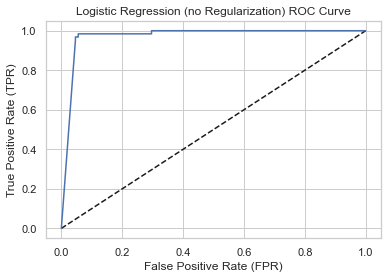

[[106   2]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

R2 with l1 Regularization: 0.9824561403508771
Area under ROC curve: 0.9973544973544973


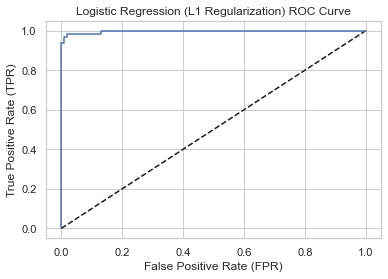

[[106   2]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

R2 with l2 Regularization: 0.9824561403508771
Area under ROC curve: 0.9979423868312757


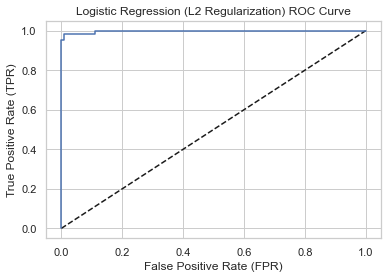

[[106   2]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

R2 with elasticnet Regularization: 0.9824561403508771
Area under ROC curve: 0.9977954144620811


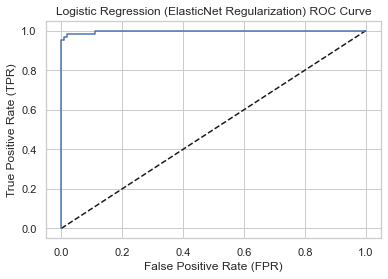

In [14]:
X_testSS = SS.transform(X_test)


y_pred_LR = LR.predict(X_testSS)
LR_score = LR.score(X_testSS, y_test)

print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

fpr, tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_testSS)[:,1])
auc = roc_auc_score(y_test, LR.predict_proba(X_testSS)[:,1])
print('R2 with no Regularization:', LR_score)
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (no Regularization) ROC Curve')
plt.show()



y_pred_LR1 = LR1.predict(X_testSS)
LR1_score = LR1.score(X_testSS, y_test)

print(confusion_matrix(y_test, y_pred_LR1))
print(classification_report(y_test, y_pred_LR1))

fpr, tpr, thresholds = roc_curve(y_test, LR1.predict_proba(X_testSS)[:,1])
auc = roc_auc_score(y_test, LR1.predict_proba(X_testSS)[:,1])
print('R2 with l1 Regularization:', LR1_score)
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (L1 Regularization) ROC Curve')
plt.show()



y_pred_LR2 = LR2.predict(X_testSS)
LR2_score = LR2.score(X_testSS, y_test)

print(confusion_matrix(y_test, y_pred_LR2))
print(classification_report(y_test, y_pred_LR2))

fpr, tpr, thresholds = roc_curve(y_test, LR2.predict_proba(X_testSS)[:,1])
auc = roc_auc_score(y_test, LR2.predict_proba(X_testSS)[:,1])
print('R2 with l2 Regularization:', LR2_score)
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (L2 Regularization) ROC Curve')
plt.show()



y_pred_LR12 = LR12.predict(X_testSS)
LR12_score = LR12.score(X_testSS, y_test)

print(confusion_matrix(y_test, y_pred_LR12))
print(classification_report(y_test, y_pred_LR12))

fpr, tpr, thresholds = roc_curve(y_test, LR12.predict_proba(X_testSS)[:,1])
auc = roc_auc_score(y_test, LR12.predict_proba(X_testSS)[:,1])
print('R2 with elasticnet Regularization:', LR12_score)
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (ElasticNet Regularization) ROC Curve')
plt.show()

Upon looking at the results of the classification report and the confusion matrix of each model, it's clear that regularization improved the models.
- But, the default value used (1.0) for each type of regularization doesn't seem to make too much difference.

Let's do a more in-depth search through the regularization parameters to find the best performing model.

In [15]:
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-8,5,14,base=2) # for all models
l1_ratio_space = np.linspace(0, 1, 5) # for elasticnet

# Grid Search for l1 and l2 regularization using liblinear solver.
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg = LogisticRegression(max_iter = 10000, solver='liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
# Fit it to the training data
logreg_cv.fit(X_trainSS,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

# Grid Search for elastic net regularization using saga solver.
paramEN_grid = {'C': c_space, 'l1_ratio': l1_ratio_space}
logregEN = LogisticRegression(max_iter = 10000, penalty = 'elasticnet', solver='saga')
logregEN_cv = GridSearchCV(logregEN, paramEN_grid, cv = 5, verbose = 1, n_jobs = 3)

# Fit it to the training data
logregEN_cv.fit(X_trainSS,y_train)

print("Tuned Logistic Regression Elasticnet Parameter: {}".format(logregEN_cv.best_params_))
print("Tuned Logistic Regression Elasticnet Accuracy: {}".format(logregEN_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.0625, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.977373417721519
Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 188 tasks      | elapsed:    3.1s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   21.4s finished


Tuned Logistic Regression Elasticnet Parameter: {'C': 2.0, 'l1_ratio': 0.75}
Tuned Logistic Regression Elasticnet Accuracy: 0.9773101265822784


In [16]:
LRbest = LogisticRegression(max_iter = 10000, solver='liblinear', C = 0.0625, penalty = 'l2').fit(X_trainSS,y_train)
LRbestCoef = LRbest.coef_
LRbestInt = LRbest.intercept_
print('The coefficients:', LRbestCoef)
print('The intercept:', LRbestInt)

The coefficients: [[ 0.30769976  0.31719451  0.30010453  0.31743989  0.13861718  0.00829978
   0.31412713  0.41176896  0.04644228 -0.16281799  0.39216953 -0.00283859
   0.29122088  0.31417631  0.04829839 -0.17319389 -0.03460772  0.08638352
  -0.1043422  -0.20156753  0.41045144  0.45221953  0.37486084  0.38995835
   0.30388586  0.13847303  0.34629239  0.39245912  0.36246195  0.07803815]]
The intercept: [-0.33611368]


In [17]:
print('These parameters seems to show a signifant impact on the classification:')
print(BCW_df.drop('diagnosis_M',axis=1).columns[np.abs(LRbestCoef[0]>=.3)].values)


print('These parameters had the least impact on the classification:')
print(BCW_df.drop('diagnosis_M',axis=1).columns[np.abs(LRbestCoef[0]<.05)].values)

These parameters seems to show a signifant impact on the classification:
['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'concavity_mean' 'concave points_mean' 'radius_se' 'area_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'concavity_worst' 'concave points_worst'
 'symmetry_worst']
These parameters had the least impact on the classification:
['compactness_mean' 'symmetry_mean' 'fractal_dimension_mean' 'texture_se'
 'smoothness_se' 'compactness_se' 'concavity_se' 'symmetry_se'
 'fractal_dimension_se']


Using the grid-search for l1, l2, and elasticnet, it seems l2 regularization with C = 0.0625 performed the best. This will be the model that will be used for comparison

0.9941520467836257
[[108   0]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Area under ROC curve: 0.9986772486772486


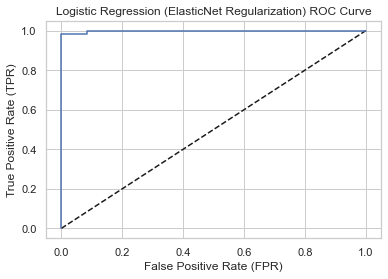

In [18]:
y_pred = logreg_cv.predict(X_testSS)
print(logreg_cv.score(X_testSS,y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, logreg_cv.predict_proba(X_testSS)[:,1])
auc = roc_auc_score(y_test, logreg_cv.predict_proba(X_testSS)[:,1])
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (ElasticNet Regularization) ROC Curve')
plt.show()

This is really good. Let's try it on the whole data set.

0.984182776801406
[[355   2]
 [  7 205]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       357
           1       0.99      0.97      0.98       212

    accuracy                           0.98       569
   macro avg       0.99      0.98      0.98       569
weighted avg       0.98      0.98      0.98       569

Area under ROC curve: 0.9959700861476666


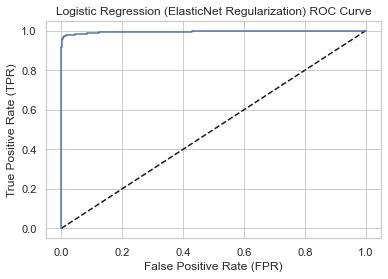

In [19]:
XSS = SS.transform(X)
y_predAll = logreg_cv.predict(XSS)
print(logreg_cv.score(XSS,y))
print(confusion_matrix(y, y_predAll))
print(classification_report(y, y_predAll))

fpr, tpr, thresholds = roc_curve(y, logreg_cv.predict_proba(XSS)[:,1])
auc = roc_auc_score(y, logreg_cv.predict_proba(XSS)[:,1])
print('Area under ROC curve:', auc)
_= plt.plot([0,1],[0,1],'k--')
_= plt.plot(fpr, tpr, label = 'Logistic Regression')
_= plt.xlabel('False Positive Rate (FPR)')
_= plt.ylabel('True Positive Rate (TPR)')
_= plt.title('Logistic Regression (ElasticNet Regularization) ROC Curve')
plt.show()

This only misclassified 9 tumors out of 569 tumors as a whole.
- 7 malignant tumors were classified as benign (false negative), hence lower recall than precision.
- 2 benign tumors were classified as malignant (false positive).

This doesn't sound too good when patients being told benign want to actually have benign tumors.

May want to sacrifice some accuracy to lower the false negatives, or find a strategy to determine these borderline classified patients for a follow up check up.

Let's try to determine why these patients were misclassified.

In [20]:
y_predAll_proba = logreg_cv.predict_proba(XSS)

In [21]:
Misclassifications = (y != y_predAll)
y_predM_proba = y_predAll_proba[Misclassifications]
yM = y[Misclassifications]
print(y_predM_proba)

[[0.55860368 0.44139632]
 [0.79980396 0.20019604]
 [0.74352355 0.25647645]
 [0.79445848 0.20554152]
 [0.66639065 0.33360935]
 [0.95569454 0.04430546]
 [0.45396156 0.54603844]
 [0.5364423  0.4635577 ]
 [0.3761406  0.6238594 ]]


- We see that only one of these were completely misclassified with 95% confidence that it was Benign when it was actually Malignant.
- All other tumors had less than 80% confidence that it was benign.
- Although we will still have false negatives, we can help catch some patients that should be followed up with a check up.
- Defining a criteria based on a sensitivity/probability value may help catch patients who fit into these misclassifications.

Let's see how our error changes if we crank up our sensitivity from 0.5 up to 0.75.

In [22]:
y_new = np.zeros(yM.shape)
y_new[y_predM_proba[:,0]<0.75] = 1

y_allnew = np.zeros(y.shape)
y_allnew[y_predAll_proba[:,0]<0.75] = 1

In [23]:
print('How the model predicted:')
print(confusion_matrix(y, y_predAll))

print('Where the misclassified ones go to with new sensitivity:')
print(confusion_matrix(yM, y_new))

print('What the result looks like after new sensitivity:')    
print(confusion_matrix(y, y_allnew))

How the model predicted:
[[355   2]
 [  7 205]]
Where the misclassified ones go to with new sensitivity:
[[0 2]
 [3 4]]
What the result looks like after new sensitivity:
[[325  32]
 [  3 209]]


We still have 3 patients who will be misclassified as Benign when they're actually Malignant, but being conservative helps us possibly save four patients. Would having an additional 34 (30 patients + 4) more checkups be viable?

Maybe an expert in the field can help me answer that.

# Conclusion:
#### Overall, with the given set of attributes from a Breast tumor, with very high accuracy, we can classify patients having malignant and benign tumors.
#### Whether the outcome of the results is considered good or not may vary depending on what's important for the user.
#### Additional considerations on sensitivity can help catch some patients that the model would have trouble classifying.

# I plan on extending this project further to study additional classification models in the future.

References & Acknowledgements:
- [Cancer.org]: Society, A.C., Colorectal Cancer Facts & Figures 2017-2019. 2017
- [Cancer]. [https://www.who.int/news-room/fact-sheets/detail/cancer]: World Health Organization; [2018]. Licence: CC BY-NC-SA 3.0 IGO.
- [Receiver Operating Characteristic (ROC) ]: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
- [Kaggle]: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- [UCI Machine Learning Repository]: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/index.php]. Irvine, CA: University of California, School of Information and Computer Science.

# Let's make a positive change in the world!
#### \- Eric J. Puttock